# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline
sns.set_style(style="darkgrid")
plt.style.use("bmh")


# DATA LOADING

In [2]:
df=pd.read_csv('cleveland.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print(df.shape)
print(df.describe())
print(df.isnull())

(303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# EDA

#No. of people with heart disease vs No. of people without heart disease

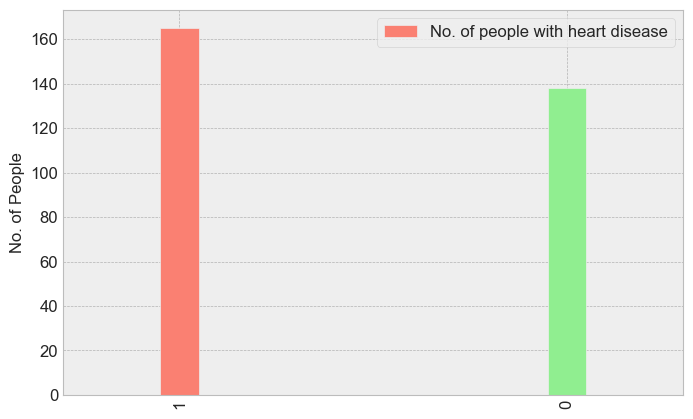

In [5]:
df.target.value_counts().plot(kind="bar",width=0.1,color=["salmon","lightgreen"],legend=1,figsize=(8,5))
plt.ylabel("No. of People", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["No. of people with heart disease"],fontsize=12);
plt.show()

# CORRELAION MATRIX HEATMAP

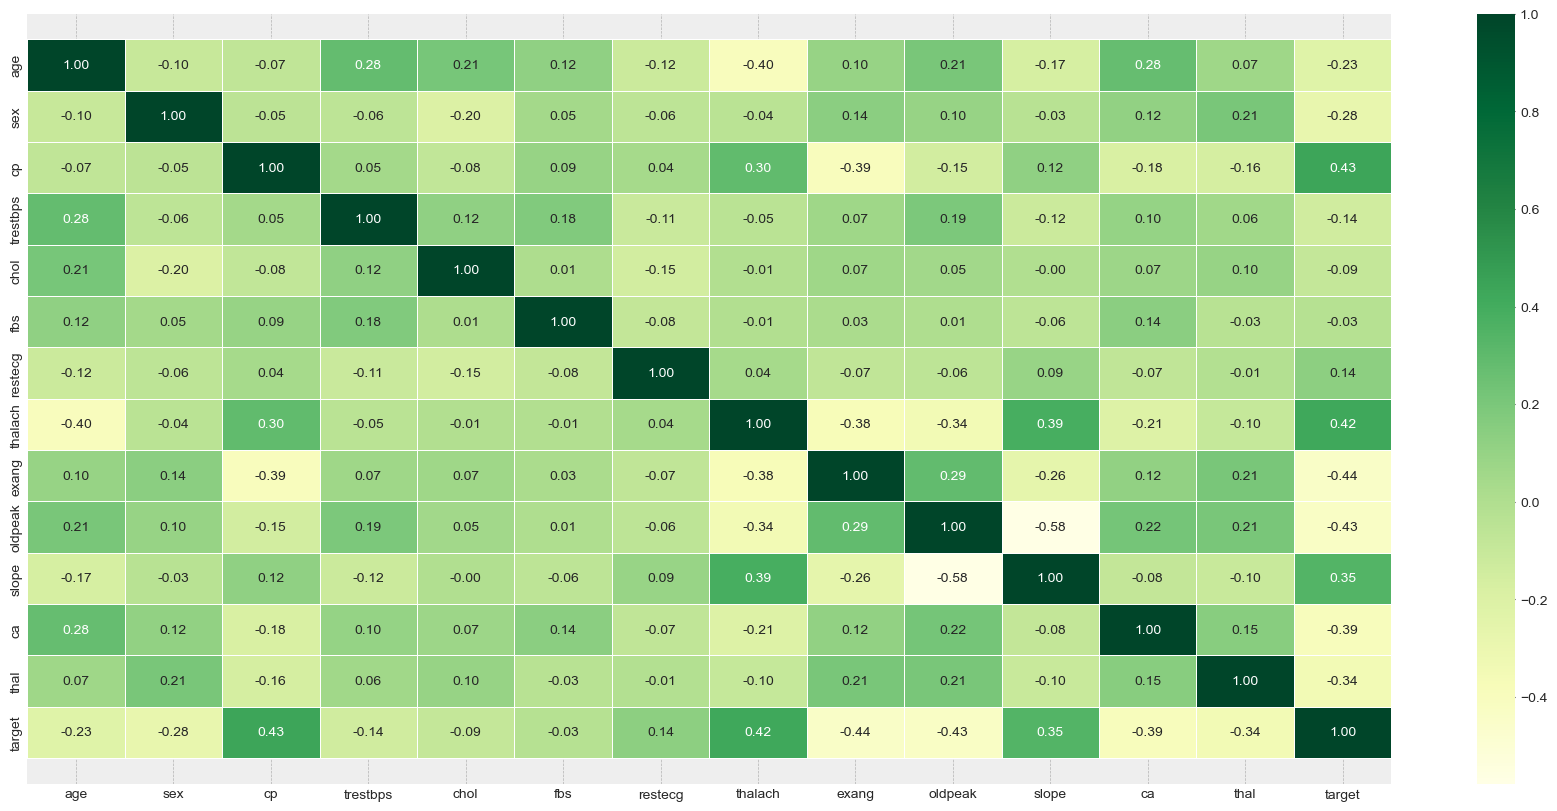

In [6]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# CORRELATION WITH TARGET

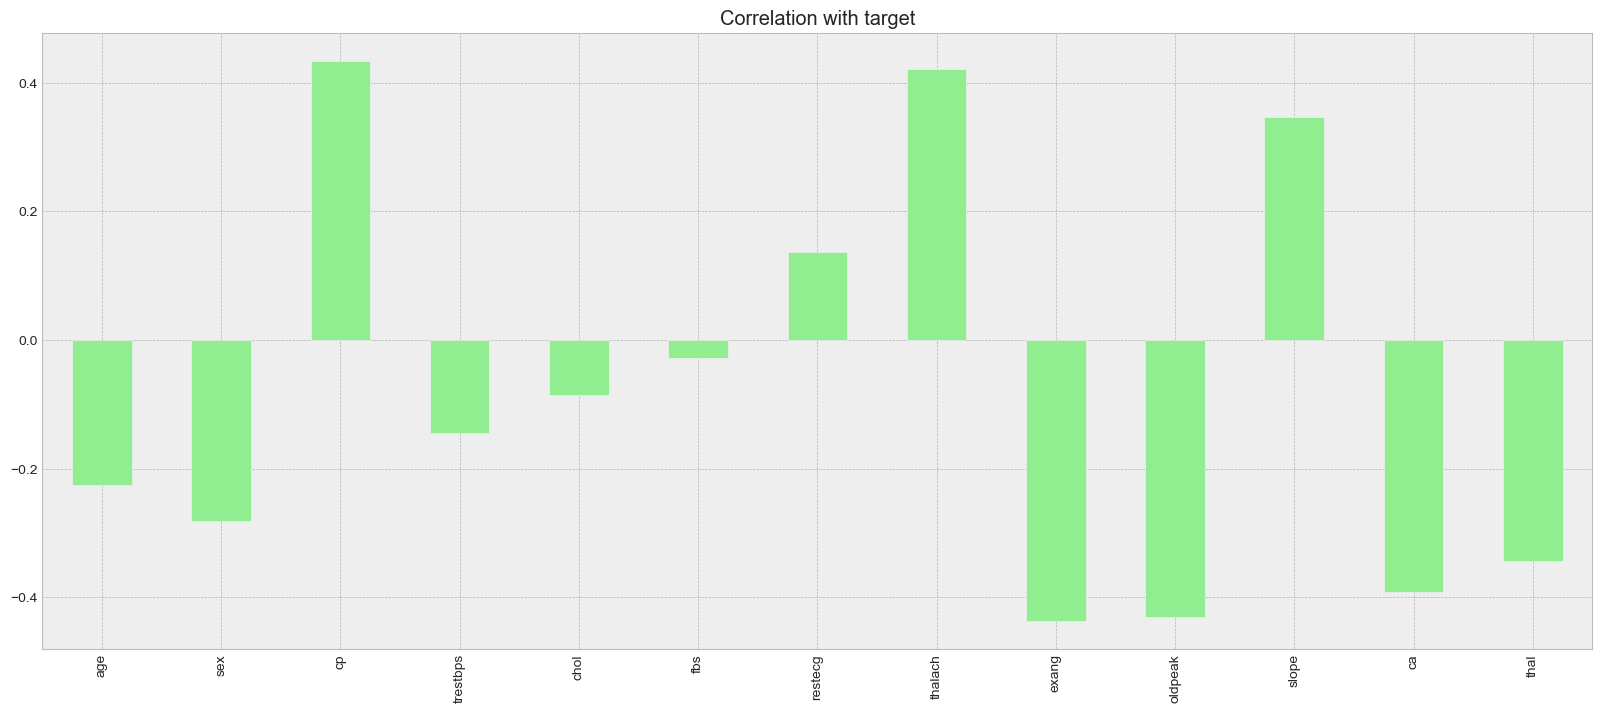

In [7]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="lightgreen");


Observations from correlation:

fbs and chol are the least correlated with the target variable.

All other variables have a significant correlation with the target variable.

Categorical and Continous Values:

-------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-------------------------------
sex : [1 0]
-------------------------------
cp : [3 2 1 0]
-------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
-------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 

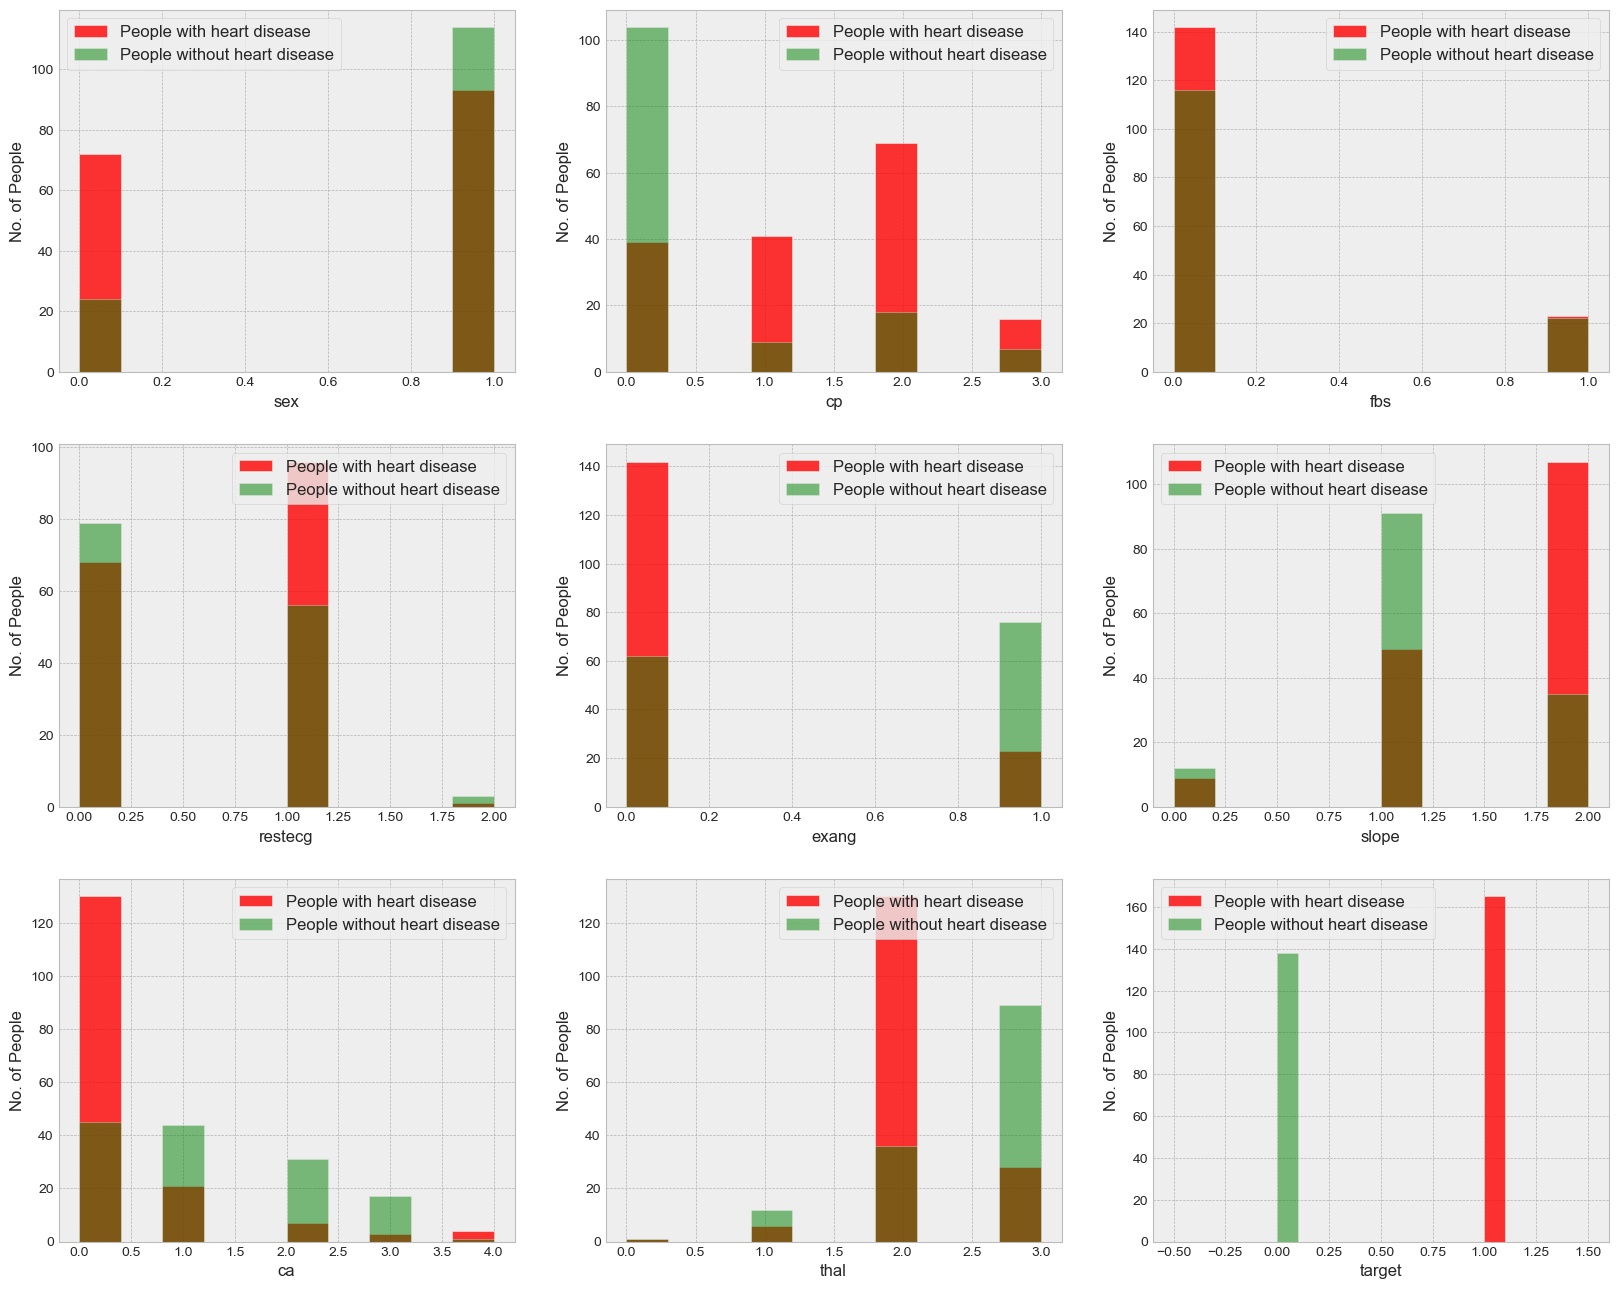

In [8]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('-------------------------------')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 1][column].hist(bins=10, color='red', label='People with heart disease',alpha=0.8)
    df[df["target"] == 0][column].hist(bins=10, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

Categorical Values Histogram

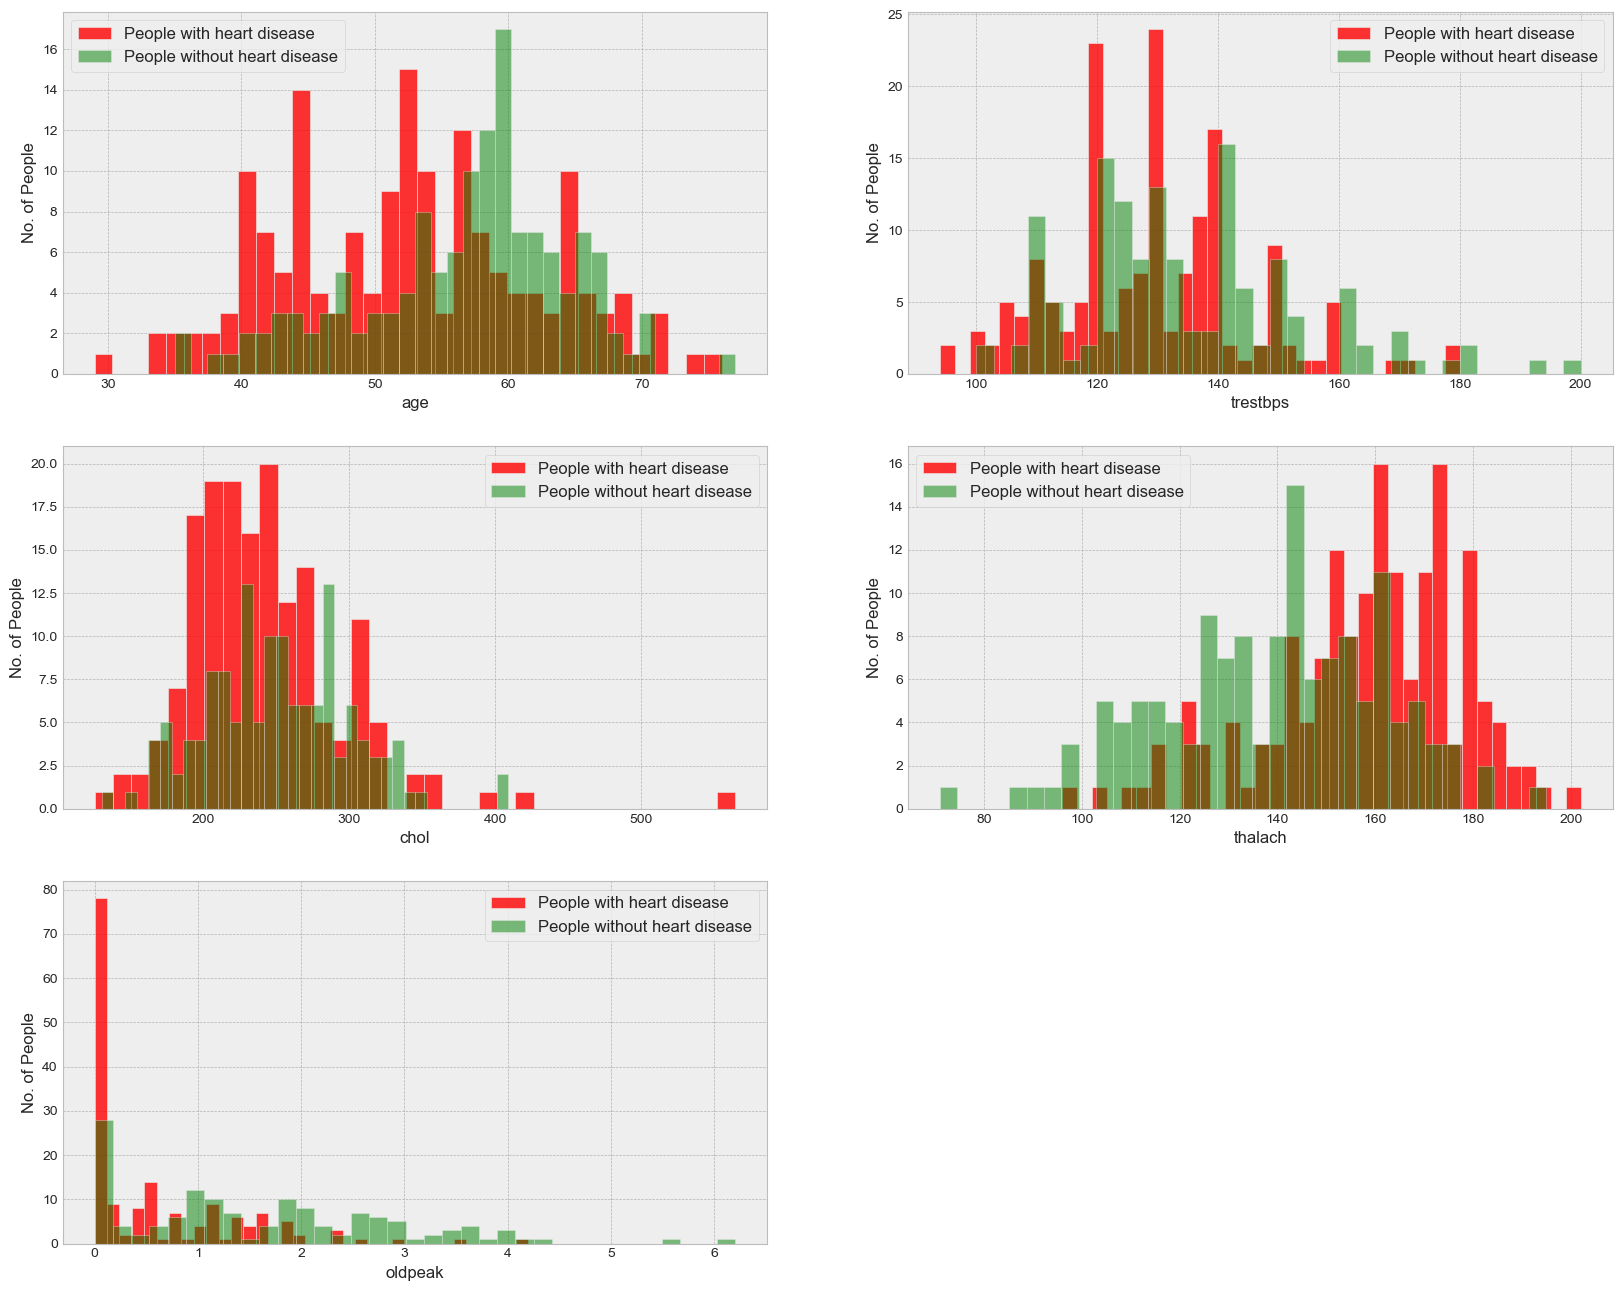

In [9]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='People with heart disease', alpha=0.8)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

Observations from the above plot:

cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
exang {exercise-induced angina}: People with a value of 0 (No - angina induced by exercise) have more heart disease than people with a value of 1 (Yes - angina induced by exercise)
slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
ca {number of major vessels (0-3) stained by fluoroscopy}: The more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

Continous Values Histogram:

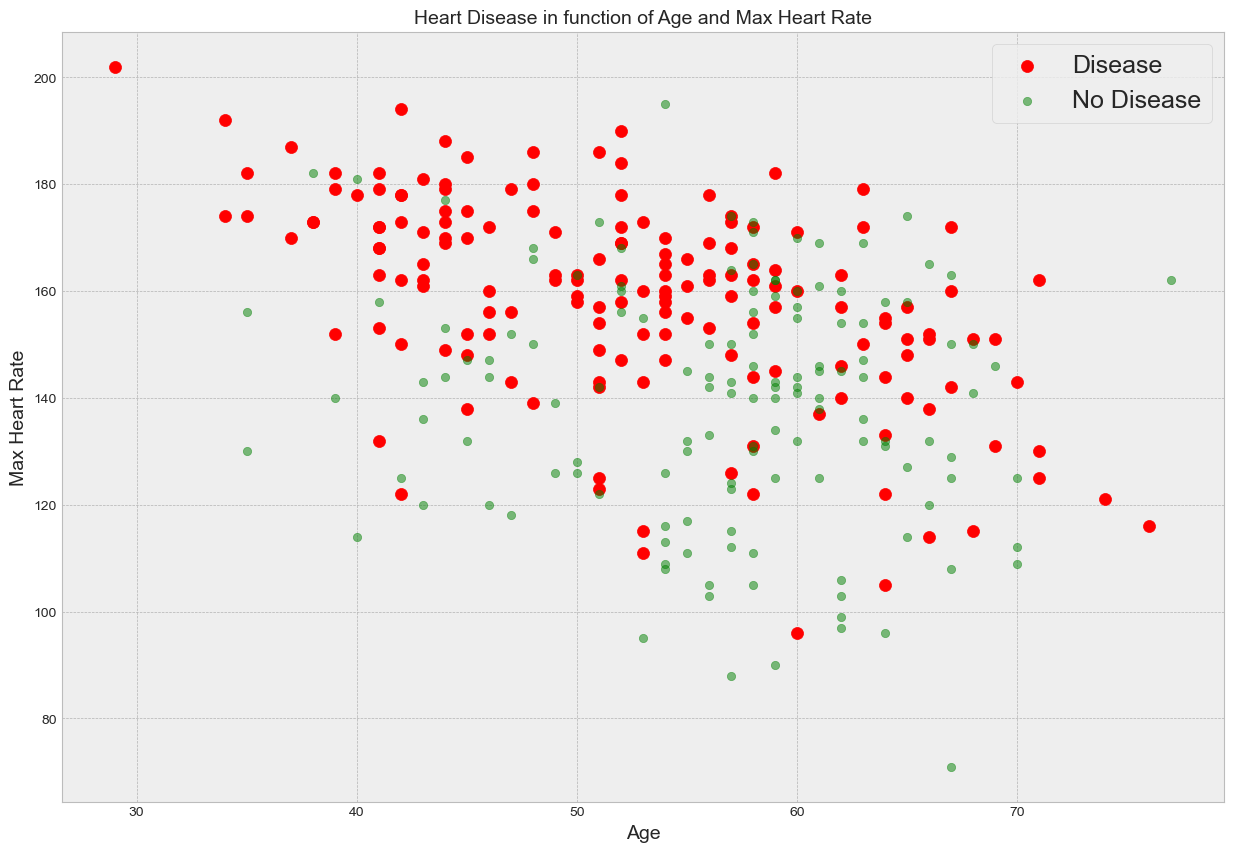

In [10]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red",s=75)
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Max Heart Rate",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Max Heart Rate", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

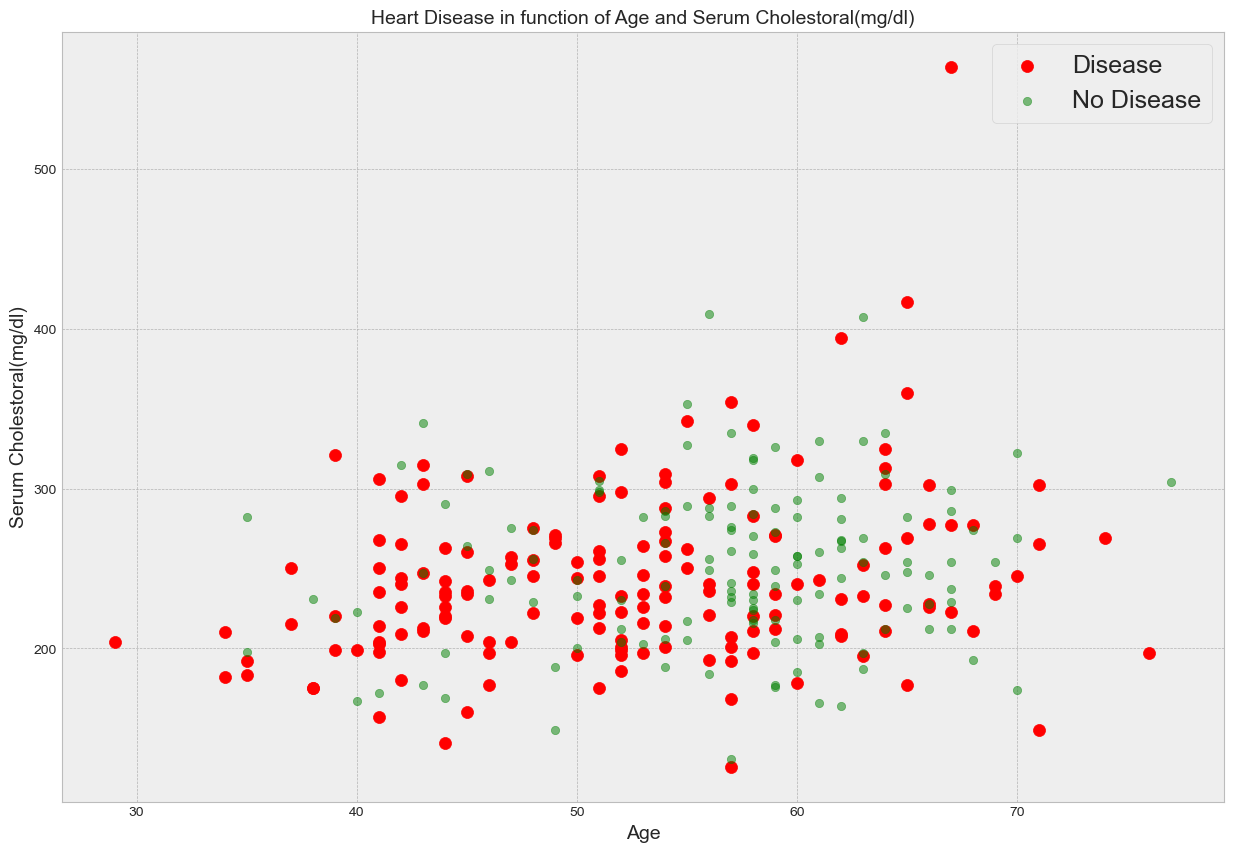

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target==1],df.chol[df.target==1],c="red",s=75)
plt.scatter(df.age[df.target==0],df.chol[df.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Serum Cholestoral(mg/dl)",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Serum Cholestoral(mg/dl)", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

Observations from the above plot:

trestbps: resting blood pressure anything above 120-140 is generally of concern.
chol: greater than 200 is of concern.
thalach: People with a maximum heart rate of over 140 are more likely to have heart disease.
the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

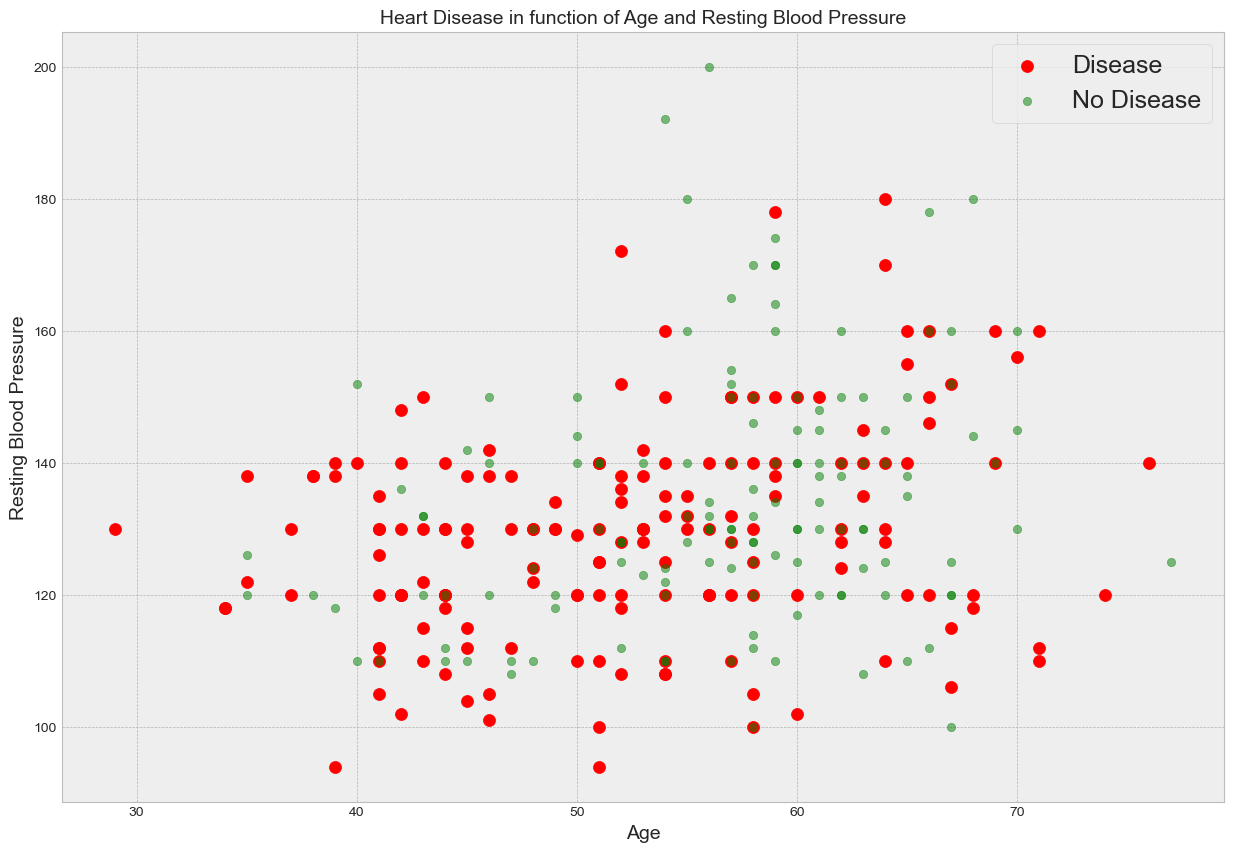

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target==1],df.trestbps[df.target==1],c="red",s=75)
plt.scatter(df.age[df.target==0],df.trestbps[df.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Resting Blood Pressure",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Resting Blood Pressure", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

# Preprocessing as per original paper

# 1. Handling missing values

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2. Normalization

In [14]:
for column in df.columns: 
    a = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    df[column] =  df[column].min() + ((df[column].max() - df[column].min())*a)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


# Proposed Methodology

# 1.Results using original dataset

In [15]:
X = df.drop(columns=['target'])
y = df['target']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape,X.shape)

(242, 13) (61, 13) (303, 13)


# Logistic Regression

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train)

accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


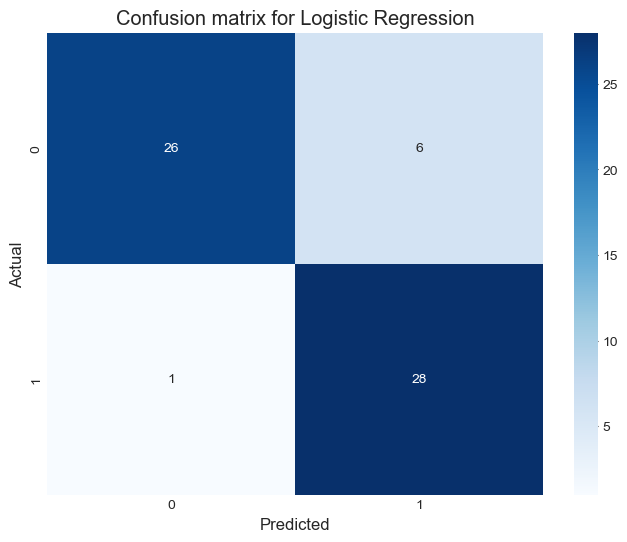

In [19]:
cm = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [20]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        32
         1.0       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



# SVM

In [21]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


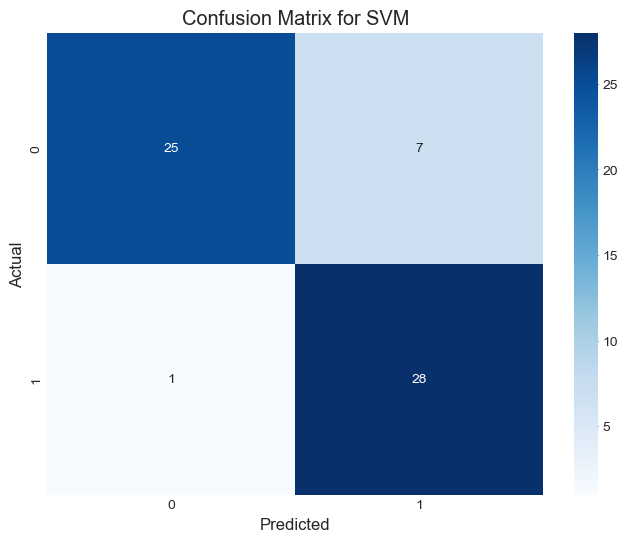

In [22]:
cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [23]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86        32
         1.0       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



# Random Forest

In [24]:
RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [25]:
RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9016393442622951


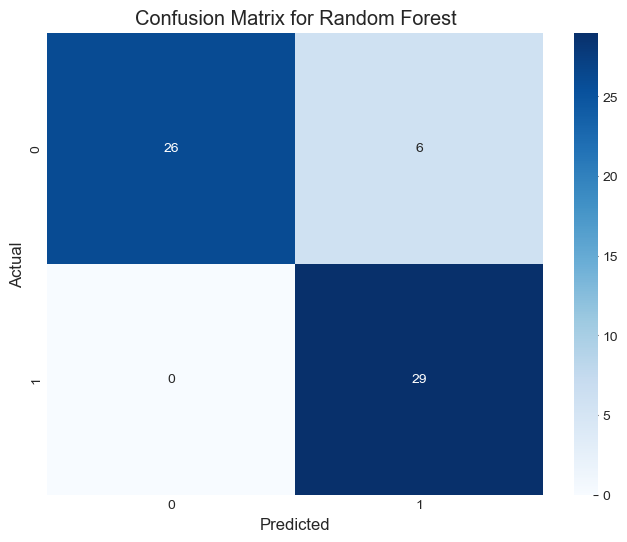

In [26]:
cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [27]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        32
         1.0       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [29]:
y_hat = neigh.predict(x_test)
y_hat

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

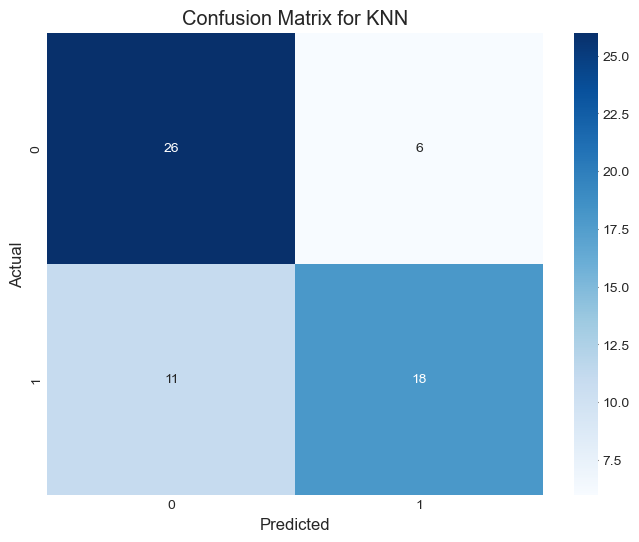

In [30]:
cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [31]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75        32
         1.0       0.75      0.62      0.68        29

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [32]:
K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.60655738, 0.63934426, 0.72131148, 0.72131148])

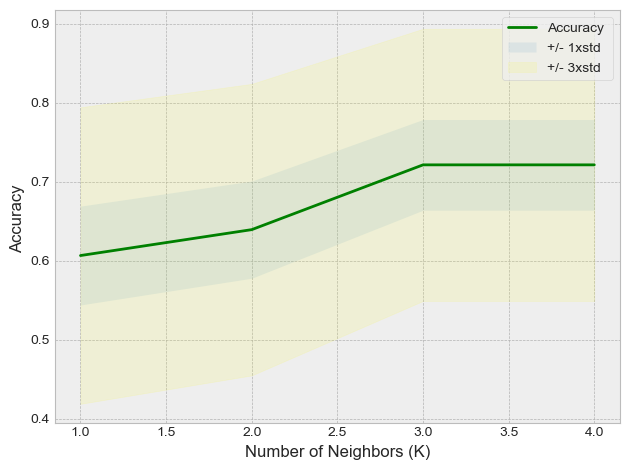

In [33]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#  Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

In [36]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        32
         1.0       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:


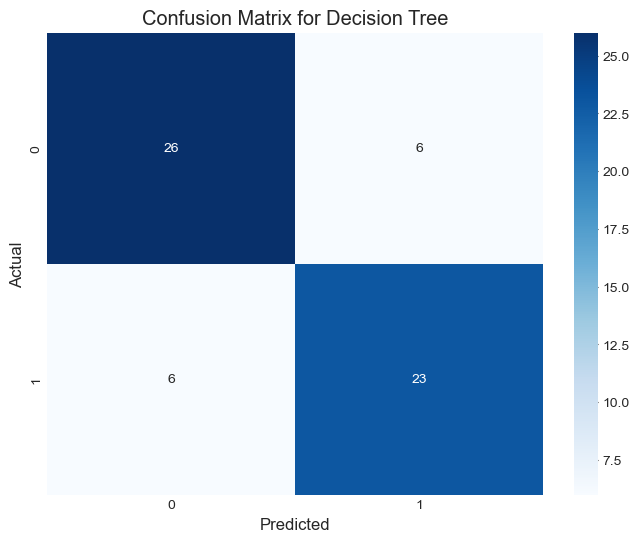

In [37]:
y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB


In [39]:
nb_classifier = GaussianNB()


In [40]:
nb_classifier.fit(x_train, y_train)


GaussianNB()

Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        32
         1.0       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        32
         1.0       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:


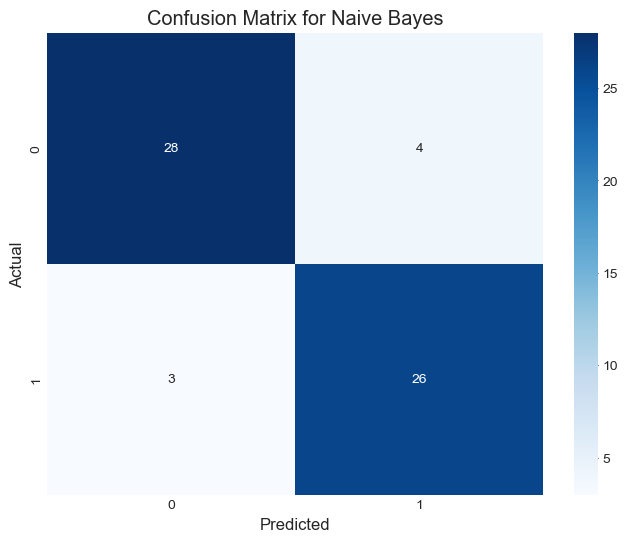

In [41]:
y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [42]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


# 2. Results after Data Balancing (SMOTE)

In [43]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

Before SMOTE: 
1 :  136
0 :  106


In [44]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

print("After SMOTE: ")
cnt1 =0
cnt0 =0
for i in y_train:
    if(i==1):
        cnt1 = cnt1+1
    else:
        cnt0 = cnt0+1

print("1 : ", cnt1)
print("0 : ", cnt0)

After SMOTE: 
1 :  136
0 :  136


In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


# Logistic Regresssion 

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
log_y_pred = model.predict(x_test)
log_y_pred1 = model.predict(x_train)

accuracy = metrics.accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


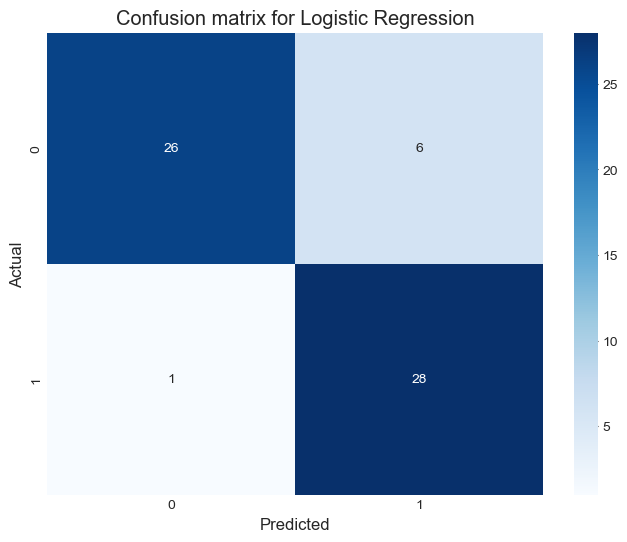

In [47]:
cm = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [48]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        32
         1.0       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



# SVM 

In [49]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951


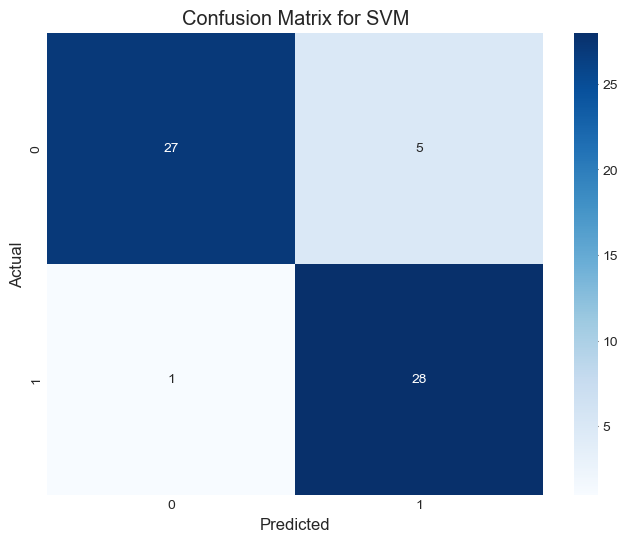

In [50]:
cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [51]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90        32
         1.0       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



# Random Forest 

In [52]:
RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [53]:
RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8852459016393442


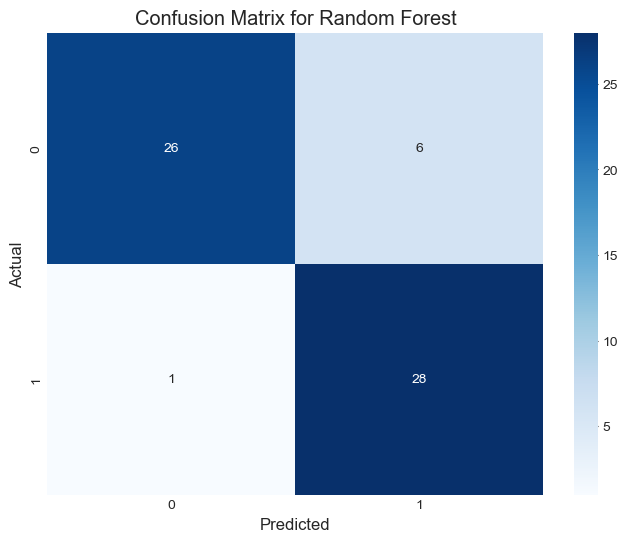

In [54]:
cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [55]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        32
         1.0       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



# KNN 

In [56]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [57]:
y_hat = neigh.predict(x_test)
y_hat

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

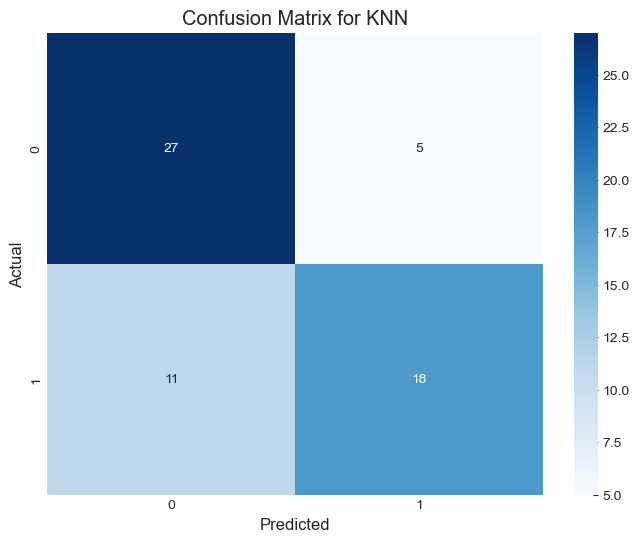

In [58]:
cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [59]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        32
         1.0       0.78      0.62      0.69        29

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



In [60]:
K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62295082, 0.63934426, 0.70491803, 0.73770492])

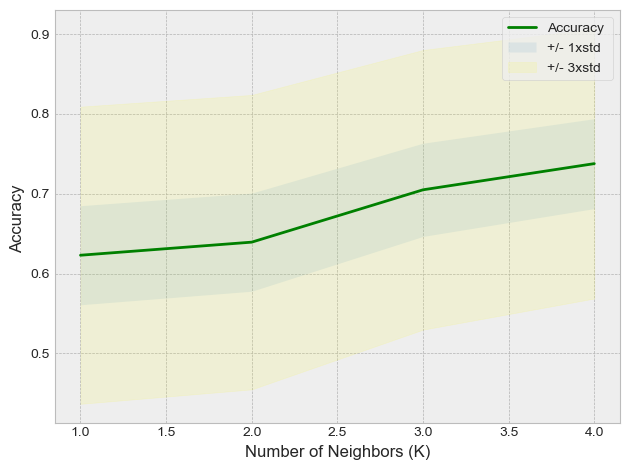

In [61]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Trees

In [62]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.819672131147541
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81        32
         1.0       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

Confusion Matrix:


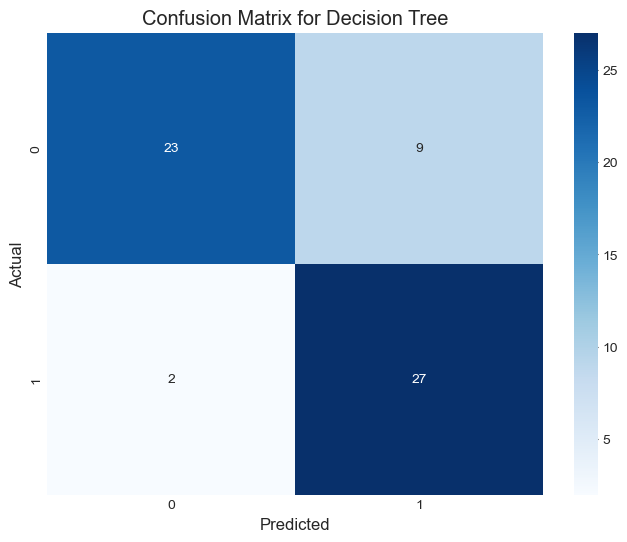

In [63]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Naive Bayes 

Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        32
         1.0       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89        32
         1.0       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:


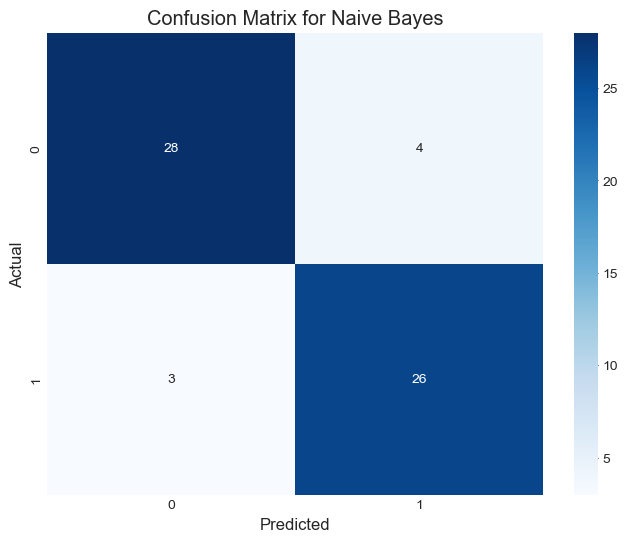

In [64]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [65]:
df1=pd.read_csv('Cleveland_heart_disease.csv')
x=df1.drop(columns=['target'])
y=df['target']
x

FileNotFoundError: [Errno 2] No such file or directory: 'Cleveland_heart_disease.csv'

#  3.Feature Selection 

# A. Relief Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from skrebate import ReliefF



X = pd.get_dummies(x)


relief = ReliefF()


relief.fit(X.to_numpy(), y.to_numpy())


feature_scores = relief.feature_importances_

print(feature_scores)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'ReliefF Score': feature_scores})

# Sort the features by their ReliefF scores in descending order to get the ranking
feature_ranking = feature_ranking.sort_values(by='ReliefF Score', ascending=False)

# Print the ranked features
print(feature_ranking)


# B. Info Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
info_gains = mutual_info_classif(x, y)
feature_ranking = pd.DataFrame({'Feature': x.columns, 'Information Gain': info_gains})
feature_ranking = feature_ranking.sort_values(by='Information Gain', ascending=False)
feature_ranking

# Correlation based Feature Selection

In [ ]:
score=[]
for feature in x.columns:
    correlation=df1[feature].corr(y)
    score.append(correlation) 
correlation_dict = {column: correlation for column, correlation in zip(x.columns, score)}
sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True))
for feature, correlation in sorted_correlation_dict.items():
    print(f"{feature}: {correlation}")

# Relief  And Info Gain Top 50%

In [ ]:
features_r=['thal','cp','exang','ca','slope','oldpeak','thalach']       
df2=df1[features_r]

x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
print(y)
df2

# SVM

In [ ]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

print(classification_report(y_test, svc_y_pred))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_test,y_hat))

K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Desicion Tree')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Random Forest

In [ ]:
RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(classification_report(y_test, RF_y_pred))

# Relief Top 70% features 

In [ ]:
features_r=['thal','cp','exang','ca','slope','oldpeak','thalach','sex','age']       
df2=df1[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
print(x_train)
df2

# SVM

In [ ]:
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

print(classification_report(y_test, svc_y_pred))



# KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_test,y_hat))

K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



# Decision Trees

In [ ]:


from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Desicion Tree')
plt.show()



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()



# Random Forest

In [ ]:


RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(classification_report(y_test, RF_y_pred))

## Info Gain Top 70% Features

In [ ]:
features_r=['thal','cp','exang','ca','slope','oldpeak','thalach','chol','sex']       
df2=df1[features_r]

x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
print(y)
df2



# SVM

In [ ]:


svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

print(classification_report(y_test, svc_y_pred))



# KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_test,y_hat))

K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



# Decision Tree

In [ ]:
 

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Desicion Tree')
plt.show()



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()



# Random Forest

In [ ]:


RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(classification_report(y_test, RF_y_pred))

# CORRELATION BASED FEATURE SELECTION

# Top 50% features

In [ ]:
features_r=['cp','thalach','slope','restecg','fbs','chol','trestbps']       
df2=df1[features_r]

x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
print(y)
df2



# SVM

In [ ]:


svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

print(classification_report(y_test, svc_y_pred))



# KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_test,y_hat))

K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



In [ ]:
# Decision Trees 

In [ ]:


from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Desicion Tree')
plt.show()



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()



#  Random Forest

In [ ]:


RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(classification_report(y_test, RF_y_pred))

# Top 70% features

In [ ]:
features_r=['cp','thalach','slope','restecg','fbs','chol','trestbps','age','sex']       
df2=df1[features_r]
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=2)
print(y)
df2



# SVM

In [ ]:


svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

svc_y_pred1 = svc.predict(x_train)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, svc_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

print(classification_report(y_test, svc_y_pred))



# KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
neigh

y_hat = neigh.predict(x_test)
y_hat

cm = confusion_matrix(y_test, y_hat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_test,y_hat))

K = 5
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



# Decision Trees

In [ ]:
 

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Desicion Tree')
plt.show()



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred = nb_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()



# Random Forest

In [ ]:


RF = RandomForestClassifier(max_depth=15,random_state=0)
RF.fit(x_train, y_train)

RF_y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, RF_y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, RF_y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(classification_report(y_test, RF_y_pred))